

What good is data without a good plot to tell the story?



In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

#import csvs
ride_csv= "../raw_data/ride_data.csv"
city_csv= "../raw_data/city_data.csv"

#read csvs into df
ride_df = pd.read_csv(ride_csv)
city_df = pd.read_csv(city_csv)

#merge dataframes
data = pd.merge(ride_df,city_df, on='city', how='outer')
data

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban
5,Sarabury,2016-08-04 00:25:52,27.20,2429366407526,46,Urban
6,Sarabury,2016-07-25 10:44:01,17.73,4467299640441,46,Urban
7,Sarabury,2016-06-22 16:24:01,23.94,6153395712431,46,Urban
8,Sarabury,2016-01-27 17:46:45,16.39,8220809448298,46,Urban
9,Sarabury,2016-04-26 11:31:30,21.80,5969441875705,46,Urban


In [2]:
unique_cities = data["city"].unique()
cityid_df = pd.DataFrame(unique_cities).reset_index()
data_with_cityid = pd.merge(data,cityid_df,left_on='city', right_on=0, how='left')
data_with_cityid = data_with_cityid.rename(columns={0: "city1",'index': 'city id'})
data_with_cityid['city id'] = data_with_cityid['city id'] + 101
data_with_cityid

,city,date,fare,ride_id,driver_count,type,city id,city1
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban,101,Sarabury
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban,101,Sarabury
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban,101,Sarabury
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban,101,Sarabury
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban,101,Sarabury
5,Sarabury,2016-08-04 00:25:52,27.20,2429366407526,46,Urban,101,Sarabury
6,Sarabury,2016-07-25 10:44:01,17.73,4467299640441,46,Urban,101,Sarabury
7,Sarabury,2016-06-22 16:24:01,23.94,6153395712431,46,Urban,101,Sarabury
8,Sarabury,2016-01-27 17:46:45,16.39,8220809448298,46,Urban,101,Sarabury
9,Sarabury,2016-04-26 11:31:30,21.80,5969441875705,46,Urban,101,Sarabury


In [3]:
data_with_cityid = data_with_cityid.set_index('city id')
data_with_cityid

,city,date,fare,ride_id,driver_count,type,city1
city id,,,,,,,
101,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban,Sarabury
101,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban,Sarabury
101,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban,Sarabury
101,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban,Sarabury
101,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban,Sarabury
101,Sarabury,2016-08-04 00:25:52,27.20,2429366407526,46,Urban,Sarabury
101,Sarabury,2016-07-25 10:44:01,17.73,4467299640441,46,Urban,Sarabury
101,Sarabury,2016-06-22 16:24:01,23.94,6153395712431,46,Urban,Sarabury
101,Sarabury,2016-01-27 17:46:45,16.39,8220809448298,46,Urban,Sarabury


In [4]:
# Create the GroupBy object based on the "city column
fare_by_city = data_with_cityid.groupby(["city id",'city','type'])

# Calculate averages for fares from each city using the .mean() method
fare_by_city.mean()

,,,fare,ride_id,driver_count
city id,city,type,,,
101,Sarabury,Urban,23.490000,5.493915e+12,46.0
102,South Roy,Urban,26.031364,4.862249e+12,35.0
103,Wiseborough,Urban,22.676842,6.046575e+12,55.0
104,Spencertown,Urban,23.681154,4.850559e+12,68.0
105,Nguyenbury,Urban,25.899615,4.138011e+12,8.0
106,New Jeffrey,Urban,24.130000,4.605064e+12,58.0
107,Port Johnstad,Urban,25.882941,4.853955e+12,22.0
108,Jacobfort,Urban,24.779355,4.099091e+12,52.0
109,Travisville,Urban,27.220870,3.317507e+12,37.0


In [5]:
averages_per_city = fare_by_city.mean()

In [6]:
rural_data = data_with_cityid.loc[(data_with_cityid["type"] == "Rural")]
rural_avg = rural_data.groupby(["city","city id"]).mean()

In [7]:
urban_data = data_with_cityid.loc[(data_with_cityid["type"] == "Urban")]
urban_avg = urban_data.groupby(["city","city id"]).mean()

In [8]:
suburban_data = data_with_cityid.loc[(data_with_cityid["type"] == "Suburban")]
suburban_avg = suburban_data.groupby(["city","city id"]).mean()

In [9]:
avg_fare_per_city = averages_per_city["fare"]
avg_fare_per_city

city id  city                  type    
101      Sarabury              Urban       23.490000
102      South Roy             Urban       26.031364
103      Wiseborough           Urban       22.676842
104      Spencertown           Urban       23.681154
105      Nguyenbury            Urban       25.899615
106      New Jeffrey           Urban       24.130000
107      Port Johnstad         Urban       25.882941
108      Jacobfort             Urban       24.779355
109      Travisville           Urban       27.220870
110      Sandymouth            Urban       23.105926
111      New Andreamouth       Urban       24.966786
112      New Christine         Urban       24.157727
113      Stewartview           Urban       21.614000
114      Rodriguezburgh        Urban       21.332609
115      West Sydneyhaven      Urban       22.368333
116      Swansonbury           Urban       27.464706
117      Lisatown              Urban       22.225217
118      East Erin             Urban       24.478214
119   

In [10]:
total_rides_per_city = data_with_cityid["city"].value_counts()

In [11]:
total_rides_per_urban_city = urban_data["city"].value_counts()
total_rides_per_rural_city = rural_data["city"].value_counts()
total_rides_per_suburban_city = suburban_data["city"].value_counts()

In [12]:
avg_fare_per_urban_city = urban_avg['fare']
avg_fare_per_suburban_city = suburban_avg['fare']
avg_fare_per_rural_city = rural_avg['fare']

In [13]:
Suburban = plt.scatter(total_rides_per_suburban_city, avg_fare_per_suburban_city, marker="o", facecolors="lightskyblue", edgecolors="black", alpha= 0.8)
Urban = plt.scatter(total_rides_per_urban_city, avg_fare_per_urban_city, marker="o", color="lightcoral", edgecolors="black", alpha= 0.8)
Rural = plt.scatter(total_rides_per_rural_city, avg_fare_per_rural_city,  marker="o", color="gold", edgecolors="black", alpha= 0.8)

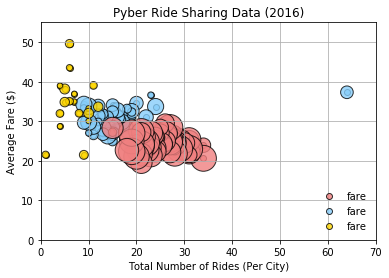

In [14]:
#idk why my legend is incorrect
plt.grid()
plt.ylim(0,55)
plt.xlim(0,70)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.scatter(total_rides_per_suburban_city, avg_fare_per_suburban_city, s= suburban_avg['driver_count']*10, marker="o",label="Suburban", facecolors="lightskyblue", edgecolors="black", alpha= 0.8)
plt.scatter(total_rides_per_urban_city, avg_fare_per_urban_city, s= urban_avg['driver_count']*10, marker="o",label="Urban", color="lightcoral", edgecolors="black", alpha= 0.8)
plt.scatter(total_rides_per_rural_city, avg_fare_per_rural_city, s= rural_avg['driver_count']*10, marker="o",label="Rural", color="gold", edgecolors="black", alpha= 0.8)
plt.legend(handles=[Urban, Suburban, Rural],loc='lower right', fancybox=True, framealpha=0)
plt.savefig("PyberBubbleChart.png")
plt.show()

In [15]:
suburban_drivers = suburban_avg["driver_count"].sum()
urban_drivers = urban_avg["driver_count"].sum()
rural_drivers = rural_avg["driver_count"].sum()

In [16]:
suburban_fares = suburban_data["fare"].sum()
urban_fares = urban_data["fare"].sum()
rural_fares = rural_data["fare"].sum()

In [17]:
urban_rides = len(urban_data)
rural_rides = len(rural_data)
suburban_rides = len(suburban_data)

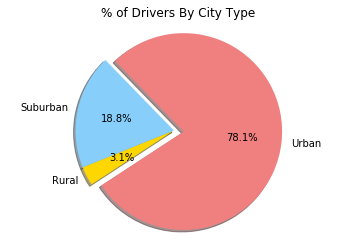

In [21]:
#pie by driver type
pie_labels = ["Rural","Urban","Suburban"]
drivers_by_type = [rural_drivers, urban_drivers, suburban_drivers]
colors= ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0.1, 0)
plt.title("% of Drivers By City Type")
plt.pie(drivers_by_type, explode=explode, labels=pie_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=202)
plt.axis("equal")
plt.savefig("PyberDriversByType.png")
plt.show()

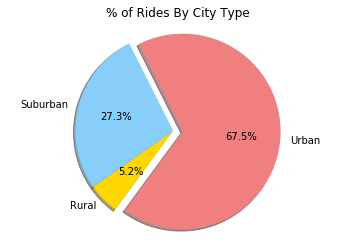

In [22]:
rides_by_type = [rural_rides, urban_rides, suburban_rides]
colors= ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0.1, 0)
plt.title("% of Rides By City Type")
plt.pie(rides_by_type, explode=explode, labels=pie_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=215)
plt.axis("equal")
plt.savefig("PyberRidersByType.png")
plt.show()

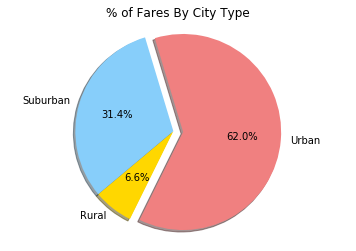

In [24]:
fares_by_type = [rural_fares, urban_fares, suburban_fares]
colors= ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0.1, 0)
plt.title("% of Fares By City Type")
plt.pie(fares_by_type, explode=explode, labels=pie_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=220)
plt.axis("equal")
plt.savefig("PyberFaresByType.png")
plt.show()

Analysis:
Rural cities have the least drivers therefore resulting in a surge in prices of Pyber rides.
Urban cities have the most drivers therefore resulting in them owning the largest share of Pyber Revenue by city type.
The more drivers a city has the cheaper the Pyber price per ride will be.